In [ ]:
# Initialize Otter; this is for autograding your answers
import otter
grader = otter.Notebook("worksheet4.ipynb")

# # Click into this cell and press shift-enter before using this notebook.
# # This line loads the ability to use %%ai in your file
# %load_ext jupyter_ai_magics
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import math

# Worksheet 4: Causality and Expressions

Please complete this notebook by filling in the cells provided.

**Recommended Reading:**
- [What is Data Science](http://www.inferentialthinking.com/chapters/01/what-is-data-science.html)
- [Causality and Experiments](http://www.inferentialthinking.com/chapters/02/causality-and-experiments.html) 
- [Programming in Python](http://www.inferentialthinking.com/chapters/03/programming-in-python.html)

For all problems that you must write explanations and sentences for, **please** provide your answer in the designated space. 

Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

## 1. Scary Arithmetic


<!-- BEGIN QUESTION -->

An ad for ADT Security Systems says,

> "When you go on vacation, burglars go to work [...] According to FBI statistics, over 25% of home burglaries occur between Memorial Day and Labor Day."

**Question 1**: Do the data in the ad support the claim that burglars are more likely to go to work during the time between Memorial Day and Labor Day? Please explain your answer.

**Note:** You can assume that "over 25%" means only slightly over. Had it been much over, say closer to 30%, then the marketers would have said so.



This is a **manually graded question (1)**

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## 2. Characters in Little Women


In lecture, we counted the number of times that the literary characters were named in each chapter of the classic book, [*Little Women*](https://inferentialthinking.com/chapters/01/3/1/Literary_Characters.html?highlight=little%20women). In computer science, the word "character" also refers to a letter, digit, space, or punctuation mark; any single element of a text. The following code generates a scatter plot in which each dot corresponds to a chapter of *Little Women*. The horizontal position of a dot measures the number of periods in the chapter. The vertical position measures the total number of characters.

In [ ]:
# Make a scatter plot of periods against characters
from urllib.request import urlopen

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
chapters = urlopen(little_women_url).read().decode().split('CHAPTER ')[1:]
text = Table().with_column('Chapters', chapters)
Table().with_columns(
    'Periods',    np.char.count(chapters, '.'),
    'Characters', text.apply(len, 0)
    ).scatter(0)

**Question 2.1** Around how many periods are there in the chapter with the most characters? 

Assign either `1`, `2`, `3`, `4`, or `5` to the name `characters_q1` below.  

(Note that what we are asking you to do here is not a coding problem; instead, the ask is to run the code, then *look at the scatterplot, and interpret the scatterplot*.  So your answer will be "approximate" based on reading the scatterplot.)

1. 250
2. 390
3. 440
4. 32,000
5. 40,000



In [ ]:
# SOLUTION
characters_q2_1 = ...

In [ ]:
grader.check("q2_1")

To discover more interesting facts from this plot, read [Section 1.3.2](https://inferentialthinking.com/chapters/01/3/2/Another_Kind_Of_Character.html) of the textbook.

## Practice with defining new columns

Suppose we want to know how many characters per period there are in each chapter. 

This will give us more practice with defining new columns for a table.

Let's start by looking at this table of text from the chapters, and seeing if we can pull out the chapter number and chapter title.

In [ ]:
text = Table().with_column('Chapters', chapters)
text

We can pull out the chapter number in all caps by applying this function to the text of the chapter.  Read through this code and try to understand how it works.

Run the following cell, and then look through each line carefully.  

The point here is to try to *understand* how the code is working.

In [ ]:
# RUN THIS CELL AND LOOK AT THE OUTPUT

# Pull out the first (and only column) of this table as an array
# Remember that `.column` gives us an array

text_array = text.column("Chapters") 
# This could also have been written: text_array = text.column(0) 
# since 0 is the index of the first column

# Now pull out just the text in the first chapter
first_chapter_text = text_array[0]

# Now show just the first 100 characters
first_chapter_text[0:100]

Look at the output from `first_chapter_text[0:100]` which represents the text of the first chapter. 

We can see that there are sequences of special characters (`\r` and `\n`) that separate the chapter number and the chapter title from the rest of the text.

```
'ONE\r\n\r\nPLAYING PILGRIMS\r\n\r\n"Christmas won\'t...
```

Whenever you see `\r` or `\n` in a Python string, those two characters are actually treated *as a single character*.

* `\n` is the *new line* character, which means "go to the next line"
* `\r` is a character that is *sometimes* used with `\n` to indicated a line break

We can use this to split the text into the chapter number, chapter title and the rest of the text:

In [ ]:
# split the text up where the \r\n separators happen
split_result = first_chapter_text.split("\r\n")
# Now show just the first five elements in the array
split_result[0:5]

In [ ]:
# We can use this to define a function that gives us back the chapter number

def text_to_chapter_number(text):
    split_result = text.split("\r\n")
    return split_result[0]

text_to_chapter_number(first_chapter_text)

**Question 2.2** We can also use this to define a function that gives us back the chapter title.  The following function, though is incorrect.  It can be fixed by changing the number `[0]` on the third line of the function to some other number.

Try each of these numbers and then assign the variable `q2_answer` to the number of the correct choice.

You'll know you get the correct choice when you get back `'PLAYING PILGRIMS'` as the result of the function call instead of `'ONE'`, or some other result.

You can also check your answer with the `grader.check("q2")` call.

You can get this right by trial and error, but then you won't learn anything; it will just be needless busy work.  So please try to think it through before answering.    If you don't understand, come to office hours and ask! You can find an office hours calendar on the course Canvas page. We are here to help.

Which of these goes after `split_result` in place of `[0]` to make the function definition correct?

1. `[1]`
2. `[2]`
3. `[3]`
4. `[4]`
5. `[5]`

In [ ]:
def text_to_chapter_title(text):
    split_result = text.split("\r\n")
    return split_result[0]

text_to_chapter_title(first_chapter_text)

In [ ]:
# SOLUTION
q2_2_answer = ...

In [ ]:
grader.check("q2_2")

## 3. More Little Women


### A new table with chapter number, chapter title, text

We can now make a new table using the `.apply` method that we've practiced several times:

In [ ]:
chapterTable = text.with_columns("Chapter Number", text.apply(text_to_chapter_number, 0)) \
               .with_columns("Title", text.apply(text_to_chapter_title, 0)) 


In [ ]:
chapterTable

Now we want to add two new columns. Looking back at the code for the scatter plot
of periods vs characters, we find this code:
```python
.with_columns(
    'Periods',    np.char.count(chapters, '.'),
    'Characters', text.apply(len, 0)
    )
```

We can apply that to our table and get a new table with the number of periods and number of characters per chapter:

In [ ]:
q3_result = ...

In [ ]:
analysis = chapterTable.with_columns(
    'Periods',    np.char.count(chapters, '.'),
    'Characters', text.apply(len, 0)
    )
analysis.show()

We can then add another column showing the characters per period:

In [ ]:
analysis = analysis.with_columns("ratio", analysis.column("Characters") / analysis.column("Periods") )
analysis.show()

Now suppose you wanted to know which chapter had the highest ratio of characters per period, and the lowest, and what those ratios are?

There are at least two ways:
* Sort the table by ratio and look at the first few rows and last few rows.
* Find the minimum and maximum value of the ratio column, and then use a 'where' clause to pull out that row in the table (or rows, in case of a tie).

By whatever means you decide, determine which chapter has the highest and lowest ratios, and what those ratios are

In [ ]:
# This is a code cell for you to write whatever code you need to get the answers to the next three questions.
# Of course you can just "cheat" and guess, but that defeats the whole purpose of the exercise.
# So please try to write some code to determine the answer.
# If you can't, then ask for help in office hours!  These are basic skills you will need in ths course!

# You may add additional code cells as needed.


In [ ]:
# A second code cell in case you need it


In [ ]:
# A third code cell in case you need it; feel free to add as many as you need.



**Question 3.1**: What is the highest ratio of characters per period for any chapter?

1. 90.4015
2. 107.556
3. 118.561
4. 193.836
5. 207.451

In [ ]:
# SOLUTION
q3_1_answer = ...

In [ ]:
grader.check("q3_1")

**Question 3.2**: What chapter has the lowest ratio of characters per period?

1. `ONE`
2. `TWENTY-ONE`
3. `NINE`
4. `FORTY`
5. `FORTY-FIVE`

In [ ]:
# SOLUTION
q3_2_answer = ...

In [ ]:
grader.check("q3_2")

### Finding a mean or median 

We can pull out the ratios into an array using column, like this:

In [ ]:
ratios = analysis.column("ratio")
ratios
len(ratios)

We can then find the mean (average) via `np.average(ratios)` as shown below:


In [ ]:
np.average(ratios)

We can also find the median via `np.median(ratios)` as shown below.

The median is a value that splits the data into two parts, where the number of values above and below the median are the same.   

When the number of values is even, there may no values in the data set that are exactly equal to the median.

But when the number of data points is odd (as it is here), there will be at least value that is exactly equal to the median.  

In [ ]:
np.median(ratios)

**Question 3.3**: What chapter has the ratio that is closest to the median value?

1. `LAZY LAURENCE`
2. `GOSSIP`
3. `AMY'S WILL`
4. `EXPERIMENTS`
5. `JO'S JOURNAL`

In [ ]:
# SOLUTION
q3_3_answer = ...

In [ ]:
grader.check("q3_3")

## 4. Job Opportunities & Education in Rural India


A [study](http://www.nber.org/papers/w16021.pdf) at UCLA investigated factors that might result in greater attention to the health and education of girls in rural India. One such factor is information about job opportunities for women. The idea is that if people know that educated women can get good jobs, they might take more care of the health and education of girls in their families, as an investment in the girls’ future potential as earners. Without the knowledge of job opportunities, the author hypothesizes that families do not invest in women’s well-being.

The study focused on 160 villages outside the capital of India, all with little access to information about call centers and similar organizations that offer job opportunities to women. In 80 of the villages chosen at random, recruiters visited the village, described the opportunities, recruited women who had some English language proficiency and experience with computers, and provided ongoing support free of charge for three years. In the other 80 villages, no recruiters visited and no other intervention was made.

At the end of the study period, the researchers recorded data about the school attendance and health of the children in the villages.

**Question 4.1.** Which statement best describes the *treatment* and *control* groups for this study? Assign either 1, 2, or 3 to the name `jobs_q1` below.

1. The treatment group was the 80 villages visited by recruiters, and the control group was the other 80 villages with no intervention.

2. The treatment group was the 160 villages selected, and the control group was the rest of the villages outside the capital of India.

3. There is no clear notion of *treatment* and *control* group in this study.



In [ ]:
# SOLUTION
jobs_q1 = ...

In [ ]:
grader.check("q4_1")

**Question 4.2.** Was this an observational study or a randomized controlled experiment? Assign either 1, 2, or 3 to the name `jobs_q2` below.

1. This was an observational study.

2. This was a randomized controlled experiment.  

3. This was a randomized observational study.



In [ ]:
jobs_q2 = ...

In [ ]:
grader.check("q4_2")

<!-- BEGIN QUESTION -->

**Question 4.3.** The study reported, "Girls aged 5-15 in villages that received the recruiting services were 3 to 5 percentage points more likely to be in school and experienced an increase in Body Mass Index, reflecting greater nutrition and/or medical care. However, there was no net gain in height. For boys, there was no change in any of these measures." 

Why do you think the author points out the lack of change in the boys?  To put it another way, why is this a significant outcome to measure and report on?

*Hint:* Remember the original hypothesis. The author is testing a hypothesis that educating women in job opportunities will cause families to invest more in the women’s well-being. So it may seem counter intuitive to report on outcomes for the boys.  Nevertheless, there are good reasons for doing so.  What do you think those are?



This is a **manually graded question (4.3)**

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## 5. Differences between Majors


Adapted from a UC campus website, the table below displays the numbers of degree recipients in three majors in the academic years 2008-2009 and 2017-2018.

| Major                              | 2008-2009    | 2017-2018   |
|------------------------------------|--------------|-------------|
| Gender and Women's Studies         |      17      |    28       |
| Linguistics                        |      49      |    67       |
| Rhetoric                           |      113     |    56       |



We can convert that into a table like this:

In [ ]:
majors = make_array("Gender and Women's Studies", "Linguistics", "Rhetoric")
year_08_09 = make_array(17, 49, 113)
year_17_18 = make_array(28, 67, 56)
table = Table().with_columns("Major",majors,"2008-2009",year_08_09, "2017-2018", year_17_18)
table

**Question 5.1.** First, add a column to the table that shows the absolute value of the difference between the two years, that is the amount of change up or down.  Call this column "absdiff".

Hints: 
* You already have variables that contain arrays of these values.
* Remember that `numpy` arrays can be subtracted from one another.
* You can apply `np.abs` to a `numpy` array and convert all of the values to their absolute value.
* Once you have that array, you can add it to the table.

When you are done you, should have a table like this (I've obscured some of the values so that you have to compute the table to answer the question)

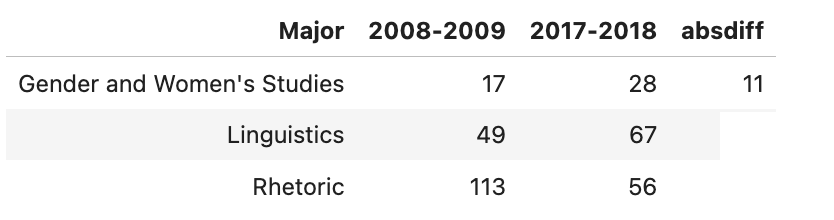

In [ ]:
# A cell for you to write your code in for the first part of Question 5.1


In [ ]:
# A second cell for you to write your code in for the first part of Question 5.1 if you need it

In [ ]:
# A third cell for you to write your code in for the first part of Question 5.1 if you need it
# If you need more cells, feel free to add them

**Question 5.1 (continued, see above)** Now answer the question below:

Assign `answer5_1` to the value of the major that has the biggest absolute change:

1. `Gender and Women's Studies`
2. `Linguistics`
3. `Rhetoric`

In [ ]:
# SOLUTION
answer5_1 = ...

In [ ]:
grader.check("q5_1")

**Question 5.2.** Which of the three majors had the **smallest** absolute difference? Assign `smallest_change_major` to 1, 2, or 3 where each number corresponds to the following major:

1: Gender and Women's Studies  
2: Linguistics  
3: Rhetoric

Choose the number that corresponds to the major with the smallest absolute difference.

In [ ]:
smallest_change_major = ...
smallest_change_major

In [ ]:
grader.check("q5_2")

**Question 5.3.**  For each major, define the "relative change" to be the following: $\large{\frac{\text{absolute difference}}{\text{value in 2008 to 2009}} * 100}$ 

Write code in the cell below to add a new column to the table called `relative change` that computes this number and adds it to the table as a column.  Note that you may be able to reuse previous variables that you defined.  

For example, do you already have a variable that contain:
* a `numpy` array with all of the absolute differences in it?
* a `numpy` array with the values from 2008 to 2009?

Remember that you can directly use `/` and `*` on these arrays to do math on all elements of the array at once.

Write this code in the cells below, and then the question continues below with a multiple choice question based on your results.


In [ ]:
# A cell for you to write your code in for the first part of Question 5.3


In [ ]:
# A second cell for you to write your code in for the first part of Question 5.3 if you need it

In [ ]:
# A third cell for you to write your code in for the first part of Question 5.3 if you need it
# If you need more cells, feel free to add them

**Question 5.3 (continued, see above)** Now answer the question below:

Assign `answer5_3` to the value of the smallest relative change

1. 26.8657
2. 36.7347
3. 39.2857
4. 50.4425
5. 64.7059


In [ ]:
# SOLUTION
answer5_3 = ...

In [ ]:
grader.check("q5_3")

**Question 5.4.** Assign `biggest_rel_change_major` to 1, 2, or 3 where each number corresponds to to the following: 

1: Gender and Women's Studies  
2: Linguistics  
3: Rhetoric

Choose the number that corresponds to the major with the biggest relative change.



In [ ]:
# Assign biggest_rel_change_major to the number corresponding to the major with the biggest relative change.
biggest_rel_change_major = ...

In [ ]:
grader.check("q5_4")

## 6. Nearsightedness Study


Myopia, or nearsightedness, results from a number of genetic and environmental factors. In 1999, Quinn et al studied the relation between myopia and ambient lighting at night (for example, from nightlights or room lights) during childhood.

<!-- BEGIN QUESTION -->

**Question 6.1.** The data were gathered by the following procedure, reported in the study. "Between January and June 1998, parents of children aged 2-16 years [...] that were seen as outpatients in a university pediatric ophthalmology clinic completed a questionnaire on the child’s light exposure both at present and before the age of 2 years." Was this study observational, or was it a controlled experiment? Explain. 



This is a **manually graded question (6.1)**

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 6.2.** The study found that one tenth of children who slept in complete darkness had myopia compared with 34% of children who slept with a night light on and 55% of children who slept with a full light on. The study concluded that, "The prevalence of myopia [...] during childhood was strongly associated with ambient light exposure during sleep at night in the first two years after birth."

Do the data support this statement? You may interpret "strongly" in any reasonable qualitative way.

This is a **manually graded question (6.2)**

*Type your answer here, replacing this text.*

<!-- BEGIN QUESTION -->

**Question 6.3.** On May 13, 1999, CNN reported the results of this study under the headline, "Night light may lead to nearsightedness." Does the conclusion of the study claim that night light causes nearsightedness?



This is a **manually graded question (6.3)**

_Type your answer here, replacing this text._

###### <!-- END QUESTION -->

**Question 6.4.** The final paragraph of the CNN report said that "several eye specialists" had pointed out that the study should have accounted for heredity.

Myopia is passed down from parents to children. Myopic parents are more likely to have myopic children, and may also be more likely to leave lights on habitually (since the parents have poor vision). In what way does the knowledge of this possible genetic link affect how we interpret the data from the study? 


This is a **manually graded question (6.4)**

*Type your answer here, replacing this test.*

## 7. Studying the Survivors


The Reverend Henry Whitehead was skeptical of John Snow’s conclusion about the Broad Street pump. After the Broad Street cholera epidemic ended, Whitehead set about trying to prove Snow wrong.  (The history of the event is detailed [here](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1034367/pdf/medhist00183-0026.pdf).)

He realized that Snow had focused his analysis almost entirely on those who had died. Whitehead, therefore, investigated the drinking habits of people in the Broad Street area who had not died in the outbreak.

**Question 7**: What is the main reason it was important to study this group?

1) If Whitehead had found that many people had drunk water from the Broad Street pump and not caught cholera, that would have been evidence against Snow's hypothesis.

2) Survivors could provide additional information about what else could have caused the cholera, potentially unearthing another cause.

3) Through considering the survivors, Whitehead could have identified a cure for cholera.



In [ ]:
# SOLUTION
# Assign survivor_answer to 1, 2, or 3
survivor_answer = ...

In [ ]:
grader.check("q7_1")

**Note:** Whitehead ended up finding further proof that the Broad Street pump played the central role in spreading the disease to the people who lived near it. Eventually, he became one of Snow’s greatest defenders.

## 8. Submit your work

Before you submit your work, 
* Make sure you **save the notebook** first, 
* Then go up to the `Kernel` menu and select `Restart & Clear Output` (make sure the notebook is saved first, because otherwise, you will lose all your work!). 
* Now, go to `Cell -> Run All`. Carefully look through your notebook and verify that all computations execute correctly. You should see **no errors**; if there are any errors, make sure to correct them before you submit the notebook.
* Scroll up to see all Code cells have a number next to them, e.g., "In [10]:". There may be some intentional errors. You can click below the cell with the intentional error, and then click `Cell -> Run All Below`.
* Then, go to `File -> Download as -> Notebook` and download the notebook to your own computer. ([Please verify](https://ucsb-ds.github.io/ds1-f20/troubleshooting/#i-downloaded-the-notebook-file-but-it-saves-as-the-ipynbjson-extension-so-whenever-i-upload-it-to-gradescope-it-fails) that it got saved as an `.ipynb` file.)
* Upload the notebook to [Gradescope](https://www.gradescope.com/).

Congratulations! You are done!